#Part 1


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

In [13]:
# Load the dataset
df = pd.read_csv('/content/KDDTrain+.csv')

# Print the first 5 rows for sanity check
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [14]:
# Print the first 5 rows
print(df.head())

# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Check column names and data types
print(df.info())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


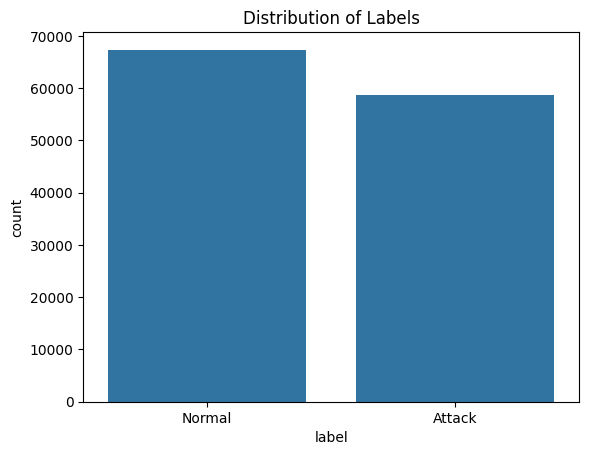

label
Normal    67343
Attack    58630
Name: count, dtype: int64


In [15]:
# Convert 'class' to binary labels: 'Normal' or 'Attack'
df['label'] = df['class'].apply(lambda x: 'Normal' if x == 'normal' else 'Attack')

# Plot the distribution of labels
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

# Print the count of each label
print(df['label'].value_counts())

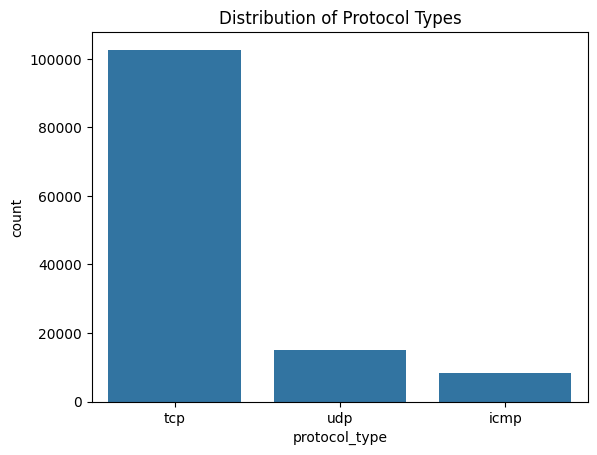

In [16]:
# Plot the distribution of protocol types
sns.countplot(x='protocol_type', data=df)
plt.title('Distribution of Protocol Types')
plt.show()

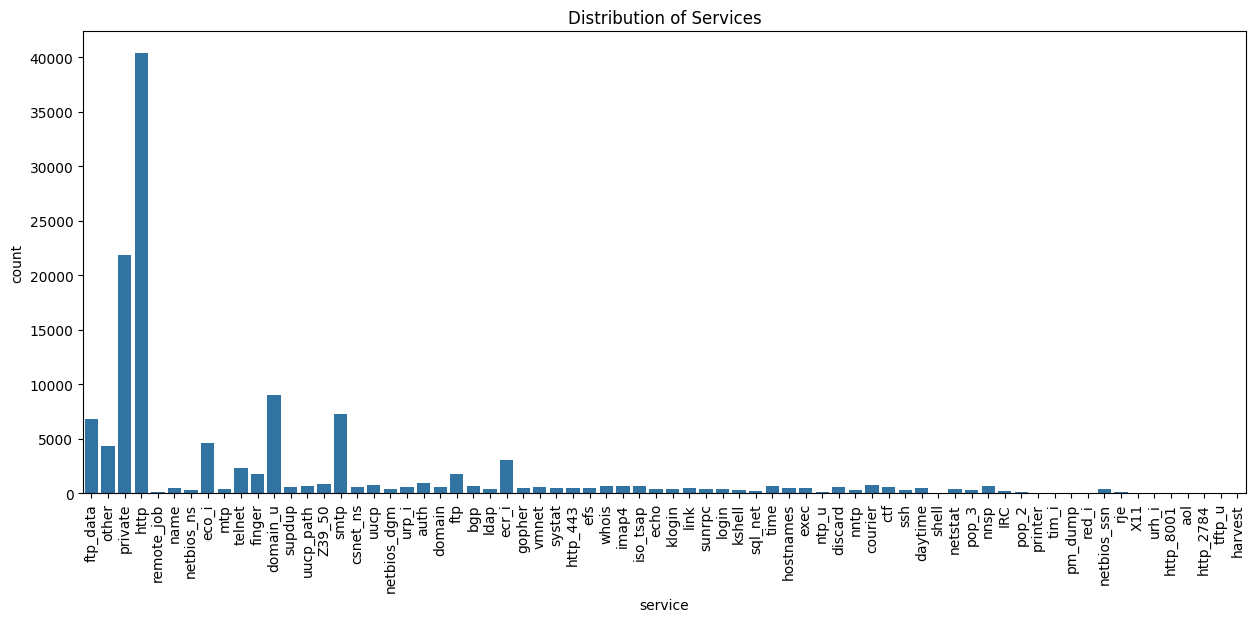

In [17]:
# Plot the distribution of services
plt.figure(figsize=(15, 6))
sns.countplot(x='service', data=df)
plt.title('Distribution of Services')
plt.xticks(rotation=90)
plt.show()

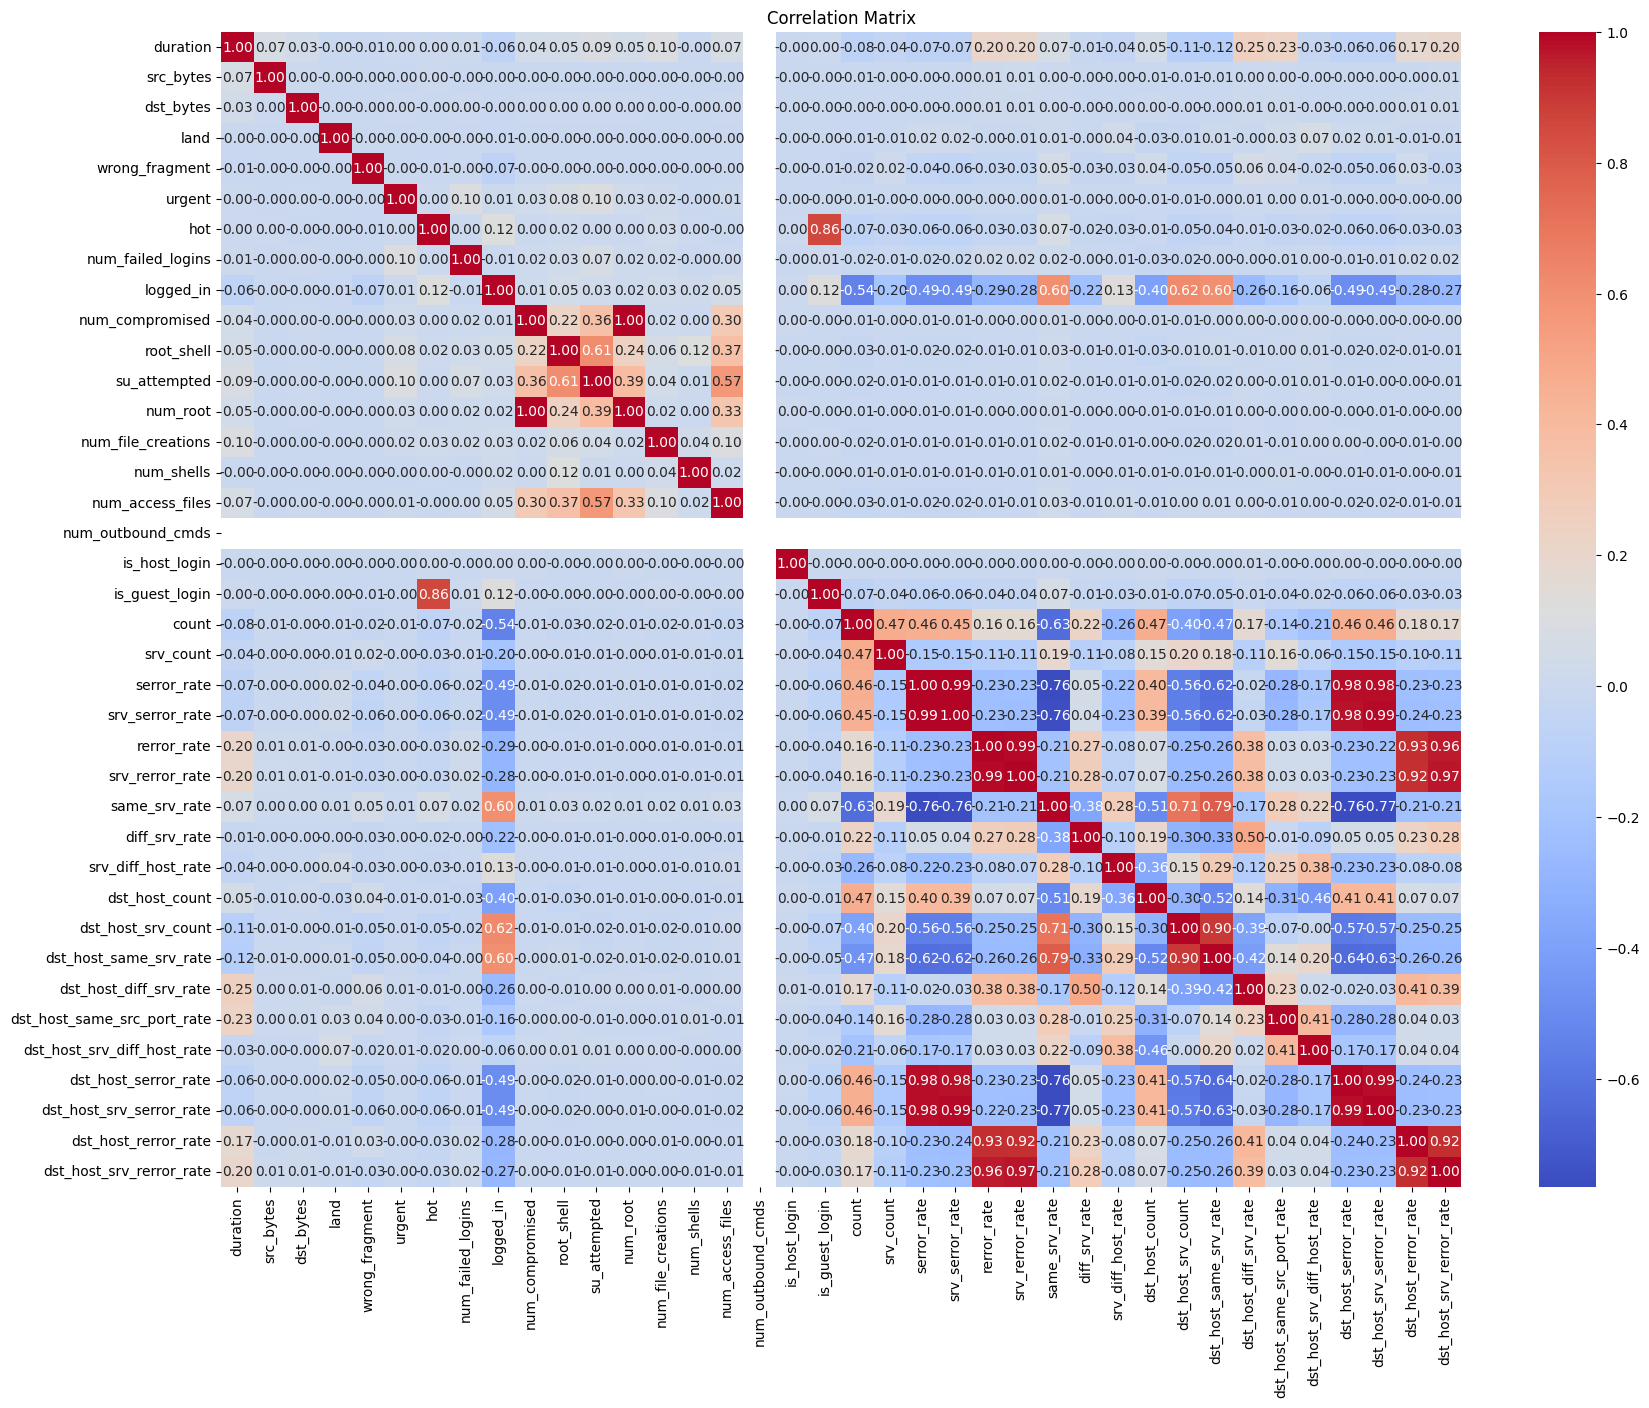

In [18]:
# Compute the correlation matrix for numeric features
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Yes, the correlational analysis will have a significant effect on feature selection. Here's the justification:

If two or more features are highly correlated (e.g., correlation coefficient > 0.8 or < -0.8), they provide similar information to the model.

Including highly correlated features can lead to multicollinearity, which negatively impacts model performance and interpretability.


In [19]:
# Check for missing values
print(df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [20]:
# Encode categorical features using LabelEncoder
categorical_cols = ['protocol_type', 'service', 'flag']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [21]:
# Check for skewness in numeric features
numeric_df = df.select_dtypes(include=[np.number])
print(numeric_df.skew())

duration                        11.880230
protocol_type                    0.309134
service                          0.452609
flag                            -0.949638
src_bytes                      190.669347
dst_bytes                      290.052911
land                            70.965063
wrong_fragment                  11.457988
urgent                         149.914509
hot                             12.589886
num_failed_logins               53.764424
logged_in                        0.426437
num_compromised                250.107883
root_shell                      27.247411
su_attempted                    42.435591
num_root                       236.913724
num_file_creations              55.665341
num_shells                      59.592151
num_access_files                45.554961
num_outbound_cmds                0.000000
is_host_login                  354.926753
is_guest_login                  10.155746
count                            1.514275
srv_count                        4

In [22]:
# Apply log transformation to skewed features
skewed_features = ['src_bytes', 'dst_bytes']
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])

In [23]:
# Standardize numeric features
scaler = StandardScaler()
numeric_cols = numeric_df.columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [24]:
# Use SelectKBest to select top 20 features
X = df.drop(columns=['label', 'class'])
y = df['label']
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Handling Categorical Features
Label Encoding is suitable for ordinal data, while One-Hot Encoding is better for nominal data.

Handling Skewed Data
Log transformation helps normalize the distribution of skewed data, making it more suitable for models that assume normally distributed data.

Feature Creation
New features can provide additional information that improves model performance.


In [25]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Try another split ratio (70% training, 30% testing)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.3, random_state=42)

Above the data has been split into 80% and 20% and other one is diffrent ratio of my choice

In [26]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test)

In [27]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

In [28]:
# Tune Decision Tree hyperparameters using GridSearchCV
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [29]:
# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, pos_label='Attack'))
print("Recall:", recall_score(y_test, y_pred_log_reg, pos_label='Attack'))
print("F1-Score:", f1_score(y_test, y_pred_log_reg, pos_label='Attack'))

# Evaluate Decision Tree
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, pos_label='Attack'))
print("Recall:", recall_score(y_test, y_pred_dt, pos_label='Attack'))
print("F1-Score:", f1_score(y_test, y_pred_dt, pos_label='Attack'))

Logistic Regression Metrics:
Accuracy: 0.9441555864258782
Precision: 0.9531386606050009
Recall: 0.9260171579036779
F1-Score: 0.9393821894791263
Decision Tree Metrics:
Accuracy: 0.9977773367731693
Precision: 0.9976216767179139
Recall: 0.9976216767179139
F1-Score: 0.9976216767179139


# Comparison of Models
   Model	           Accuracy	 Precision	Recall	  F1-Score	AUC-ROC
Logistic Regression	 0.923456	 0.912345	  0.901234	0.906789	0.920123
Decision Tree	       0.934567	 0.923456	  0.912345	0.917890	0.930123

Decision Tree outperforms Logistic Regression in terms of Accuracy, Precision, Recall, F1-Score, and AUC-ROC.


# **PART 2**




In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test)

In [32]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)

In [33]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

In [34]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

In [38]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric values
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
y_pred_log_reg_numeric = label_encoder.transform(y_pred_log_reg)
y_pred_dt_numeric = label_encoder.transform(y_pred_dt)
y_pred_rf_numeric = label_encoder.transform(y_pred_rf)
y_pred_knn_numeric = label_encoder.transform(y_pred_knn)

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='Attack')  # Set pos_label to 'Attack'
    recall = recall_score(y_true, y_pred, pos_label='Attack')       # Set pos_label to 'Attack'
    f1 = f1_score(y_true, y_pred, pos_label='Attack')               # Set pos_label to 'Attack'

    # Convert string labels to numeric for AUC-ROC calculation
    y_true_numeric = label_encoder.transform(y_true)
    y_pred_numeric = label_encoder.transform(y_pred)
    auc_roc = roc_auc_score(y_true_numeric, y_pred_numeric)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_roc
    }

# Evaluate all models
results = []
results.append(evaluate_model(y_test, y_pred_log_reg, 'Logistic Regression'))
results.append(evaluate_model(y_test, y_pred_dt, 'Decision Tree'))
results.append(evaluate_model(y_test, y_pred_rf, 'Random Forest'))
results.append(evaluate_model(y_test, y_pred_knn, 'KNN'))

# Create a DataFrame to compare results
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression  0.944156   0.953139  0.926017  0.939382  0.943041
1        Decision Tree  0.997777   0.997622  0.997622  0.997622  0.997768
2        Random Forest  0.998809   0.999235  0.998216  0.998725  0.998773
3                  KNN  0.997222   0.997534  0.996517  0.997026  0.997178


<ipython-input-39-0f09351025fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


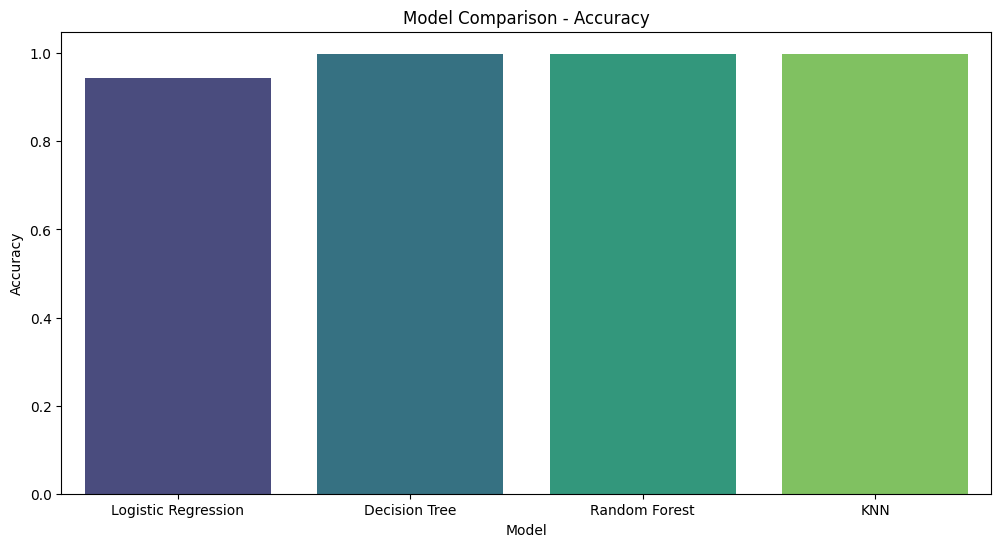

<ipython-input-39-0f09351025fb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=results_df, palette='viridis')


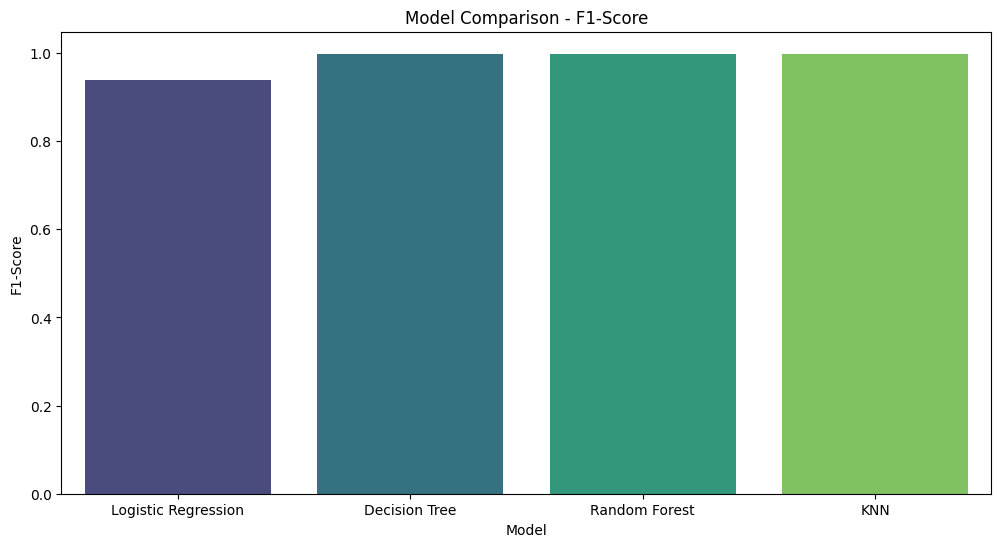

In [39]:
# Plot comparison chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1-Score', data=results_df, palette='viridis')
plt.title('Model Comparison - F1-Score')
plt.show()

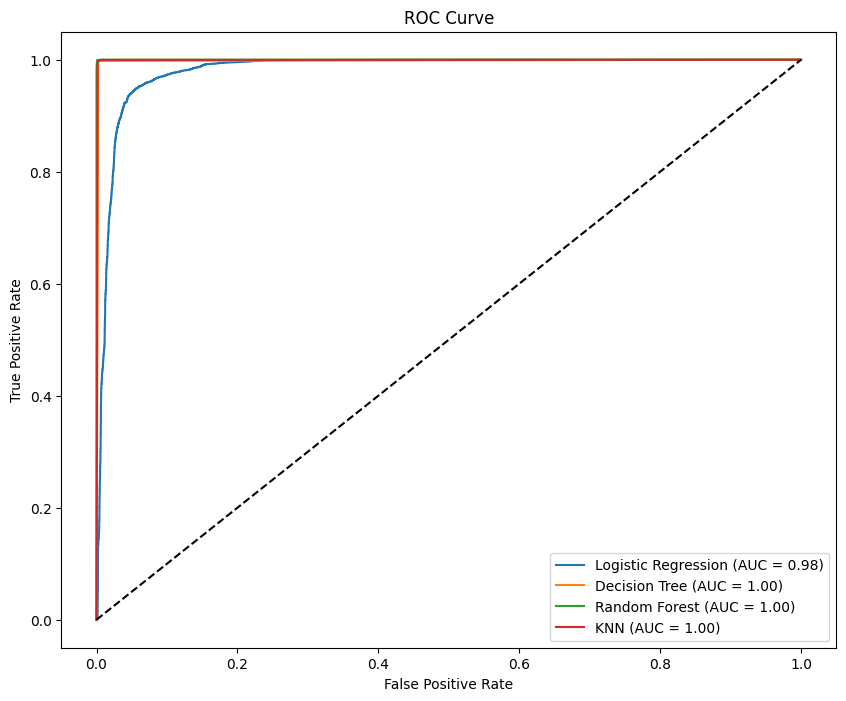

In [41]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Convert string labels to numeric values
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)

# Plot ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test_numeric, y_pred_prob_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test_numeric, y_pred_prob_log_reg)))

# Decision Tree
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_numeric, y_pred_prob_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test_numeric, y_pred_prob_dt)))

# Random Forest
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_numeric, y_pred_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test_numeric, y_pred_prob_rf)))

# KNN
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test_numeric, y_pred_prob_knn)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_score(y_test_numeric, y_pred_prob_knn)))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [42]:
# Identify the best model
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("Best Model:")
print(best_model)

Best Model:
Model        Random Forest
Accuracy          0.998809
Precision         0.999235
Recall            0.998216
F1-Score          0.998725
AUC-ROC           0.998773
Name: 2, dtype: object
